In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

In [60]:
# prepare the cities dataframe

cities_df = pd.DataFrame({ 
    "City": cities
     
    })
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Country'] = ""


cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,tugulym,,,,,,,
1,kodiak,,,,,,,
2,tuktoyaktuk,,,,,,,
3,avarua,,,,,,,
4,puerto leguizamo,,,,,,,


In [105]:
# Define URL and get the data

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
data_rows = len(cities_df)
for index, row in cities_df.iterrows():
    print(index)
    city = row['City']
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record {index+1} of {data_rows} | {city}")
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max'] 
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] =response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Lat'] =response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
            
        print("------------")
    
    time.sleep(1)


0
Processing Record 1 of 610 | tugulym
1
Processing Record 2 of 610 | kodiak
2
Processing Record 3 of 610 | tuktoyaktuk
3
Processing Record 4 of 610 | avarua
4
Processing Record 5 of 610 | puerto leguizamo
5
Processing Record 6 of 610 | port alfred
6
Processing Record 7 of 610 | ushuaia
7
Processing Record 8 of 610 | nkhata bay
8
Processing Record 9 of 610 | albany
9
Processing Record 10 of 610 | jacmel
10
Processing Record 11 of 610 | port hardy
11
Processing Record 12 of 610 | barentsburg
Missing field/result... skipping.
------------
12
Processing Record 13 of 610 | gizo
13
Processing Record 14 of 610 | kaitangata
14
Processing Record 15 of 610 | vardo
15
Processing Record 16 of 610 | kapaa
16
Processing Record 17 of 610 | taolanaro
Missing field/result... skipping.
------------
17
Processing Record 18 of 610 | tumannyy
Missing field/result... skipping.
------------
18
Processing Record 19 of 610 | cape town
19
Processing Record 20 of 610 | butaritari
20
Processing Record 21 of 610 

165
Processing Record 166 of 610 | fortuna
166
Processing Record 167 of 610 | pevek
167
Processing Record 168 of 610 | skagastrond
Missing field/result... skipping.
------------
168
Processing Record 169 of 610 | mizdah
169
Processing Record 170 of 610 | shenjiamen
170
Processing Record 171 of 610 | mandan
171
Processing Record 172 of 610 | svetlaya
172
Processing Record 173 of 610 | mitsamiouli
173
Processing Record 174 of 610 | mastic beach
174
Processing Record 175 of 610 | avera
175
Processing Record 176 of 610 | lompoc
176
Processing Record 177 of 610 | sentyabrskiy
Missing field/result... skipping.
------------
177
Processing Record 178 of 610 | waingapu
178
Processing Record 179 of 610 | tete
179
Processing Record 180 of 610 | seymchan
180
Processing Record 181 of 610 | alofi
181
Processing Record 182 of 610 | sompeta
182
Processing Record 183 of 610 | naze
183
Processing Record 184 of 610 | grand gaube
184
Processing Record 185 of 610 | finschhafen
185
Processing Record 186 of 

336
Processing Record 337 of 610 | saint george
337
Processing Record 338 of 610 | mersing
338
Processing Record 339 of 610 | westport
339
Processing Record 340 of 610 | la primavera
340
Processing Record 341 of 610 | suao
Missing field/result... skipping.
------------
341
Processing Record 342 of 610 | grand-santi
342
Processing Record 343 of 610 | coroiesti
343
Processing Record 344 of 610 | istok
344
Processing Record 345 of 610 | pisco
345
Processing Record 346 of 610 | jacksonville
346
Processing Record 347 of 610 | palmer
347
Processing Record 348 of 610 | yirol
Missing field/result... skipping.
------------
348
Processing Record 349 of 610 | bengkulu
349
Processing Record 350 of 610 | yavatmal
350
Processing Record 351 of 610 | te anau
351
Processing Record 352 of 610 | ust-maya
352
Processing Record 353 of 610 | faya
353
Processing Record 354 of 610 | nurota
354
Processing Record 355 of 610 | tshikapa
355
Processing Record 356 of 610 | samusu
Missing field/result... skipping.
-

511
Processing Record 512 of 610 | lovozero
512
Processing Record 513 of 610 | los llanos de aridane
513
Processing Record 514 of 610 | puerto escondido
514
Processing Record 515 of 610 | maniitsoq
515
Processing Record 516 of 610 | maghama
Missing field/result... skipping.
------------
516
Processing Record 517 of 610 | kidal
517
Processing Record 518 of 610 | praia
518
Processing Record 519 of 610 | bredy
519
Processing Record 520 of 610 | chopovychi
520
Processing Record 521 of 610 | west melbourne
521
Processing Record 522 of 610 | sept-iles
522
Processing Record 523 of 610 | sao filipe
523
Processing Record 524 of 610 | mocambique
Missing field/result... skipping.
------------
524
Processing Record 525 of 610 | karratha
525
Processing Record 526 of 610 | dunda
526
Processing Record 527 of 610 | igrim
527
Processing Record 528 of 610 | mizan teferi
528
Processing Record 529 of 610 | adwa
529
Processing Record 530 of 610 | berdigestyakh
530
Processing Record 531 of 610 | verkhnyaya 

In [106]:
#Print a sample of the dataframe/dataset
cities_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,tugulym,57.059101,64.642502,66.269997,90.0,41.0,2.06,RU
1,kodiak,57.790001,-152.407196,58.509998,82.0,1.0,4.61,US
2,tuktoyaktuk,69.454102,-133.037399,60.799999,77.0,75.0,8.05,CA
3,avarua,-21.207800,-159.774994,75.250000,83.0,20.0,6.91,CK
4,puerto leguizamo,-0.193400,-74.781898,75.430000,88.0,98.0,2.68,CO


In [107]:
#save to csv
cities_df.to_csv('output_data/Cities_raw_data.csv', index=False)

In [108]:
#Convert data so it can be manipulated
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"], downcast="float")
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"], downcast="float")
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"], downcast="float")
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"], downcast="float")
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"], downcast="float")
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"], downcast="float")

In [109]:
#Print a sample of the dataframe/dataset
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,tugulym,57.059101,64.642502,66.269997,90.0,41.0,2.06,RU
1,kodiak,57.790001,-152.407196,58.509998,82.0,1.0,4.61,US
2,tuktoyaktuk,69.454102,-133.037399,60.799999,77.0,75.0,8.05,CA
3,avarua,-21.207800,-159.774994,75.250000,83.0,20.0,6.91,CK
4,puerto leguizamo,-0.193400,-74.781898,75.430000,88.0,98.0,2.68,CO


In [110]:
# print out summary file and save this to a new csv
Summary_cities = cities_df.describe()
Summary_cities.to_csv('output_data/Cities_Summary_data.csv')
Summary_cities

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,19.019859,17.941374,70.927696,67.895874,57.630161,7.671419
std,33.810482,92.058525,14.887836,22.178074,37.765656,5.424251
min,-54.799999,-175.199997,32.320000,5.000000,0.000000,0.000000
25%,-9.076300,-66.382103,59.860001,56.000000,20.000000,3.780000
50%,20.894699,21.986300,73.419998,73.000000,69.000000,6.620000
75%,48.649899,98.634804,81.099998,84.000000,96.000000,10.360000
max,78.218597,179.316696,119.209999,100.000000,100.000000,35.230000


In [114]:
# replace where humidity is greater than 100% with NaN
clean_city_df = cities_df
clean_city_df['Humidity'].mask(clean_city_df['Humidity'] > 100, inplace=False)
clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,tugulym,57.059101,64.642502,66.269997,90.0,41.0,2.06,RU
1,kodiak,57.790001,-152.407196,58.509998,82.0,1.0,4.61,US
2,tuktoyaktuk,69.454102,-133.037399,60.799999,77.0,75.0,8.05,CA
3,avarua,-21.207800,-159.774994,75.250000,83.0,20.0,6.91,CK
4,puerto leguizamo,-0.193400,-74.781898,75.430000,88.0,98.0,2.68,CO


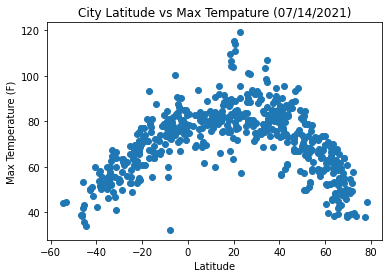

In [115]:
maxtemp = clean_city_df['Max Temp']
Lat = clean_city_df['Lat']
plt.scatter(Lat, maxtemp)
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs Max Temperature (07/14/2021)')
plt.savefig("output_data/City_MaxTemp.png")
plt.show()

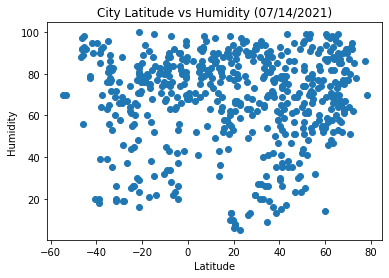

In [116]:
humidity = clean_city_df['Humidity']
plt.scatter(Lat, humidity)
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('City Latitude vs Humidity (07/14/2021)')
plt.savefig("output_data/City_Humidity.png")
plt.show()

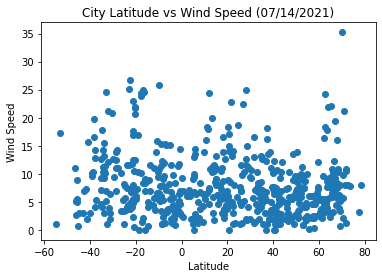

In [117]:
ws= clean_city_df['Wind Speed']
plt.scatter(Lat, ws)
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('City Latitude vs Wind Speed (07/14/2021)')
plt.savefig("output_data/City_Windspeed.png")
plt.show()

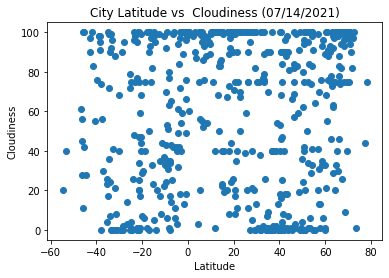

In [118]:
cloud= clean_city_df['Cloudiness']
plt.scatter(Lat, cloud)
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('City Latitude vs  Cloudiness (07/14/2021)')
plt.savefig("output_data/City_Cloudiness.png")
plt.show()

# Linear Regression for Hemispheres and Weather Data

In [119]:
#split dataset into two sections for northern and southern Hemispheres by Latitude 

cities_Northern_df= clean_city_df[clean_city_df['Lat'] > 0]
cities_Southern_df= clean_city_df[clean_city_df['Lat'] < 0]

The r-squared is: 0.4521


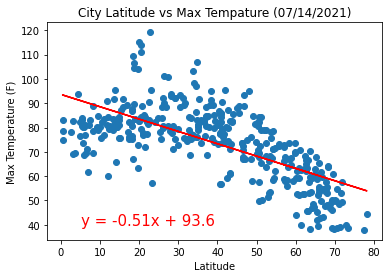

In [129]:
# Create data and plot for Latitude / Temp regression for Northen Hemisphere

maxtemp = cities_Northern_df['Max Temp']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, maxtemp)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat, maxtemp)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Tempature (07/14/2021)')
plt.annotate(line_eq,(5,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/NHCity_MaxTemp.png")
plt.show()


Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6636


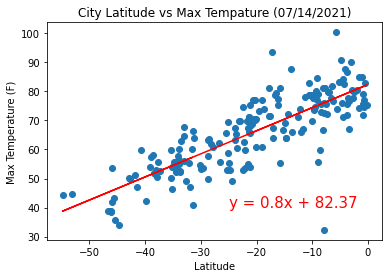

In [130]:
# Create data and plot for Latitude / Temp regression for Southern Hemisphere

maxtemp = cities_Southern_df['Max Temp']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, maxtemp)
regress_values = Lat*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.plot(Lat,regress_values,"r-")
plt.scatter(Lat, maxtemp)


plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Tempature (07/14/2021)')
plt.annotate(line_eq,(-25,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/SHCity_MaxTemp.png")
plt.show()

Data Analysis: Maximum Temperature has a relatively strong relationship with respect to latitude in both the Northern and Southern Hemispheres.  In the Northern Hemisphere, in July, Max Temperatures decrease with increasing latitude and in the Southern Hemisphere, Max Temperatures decrease with decreasing latitude. This pattern makes sense, as you move away from the equator in Southern and Northern Hemispheres, the temperature tends to decrease. 

 Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003


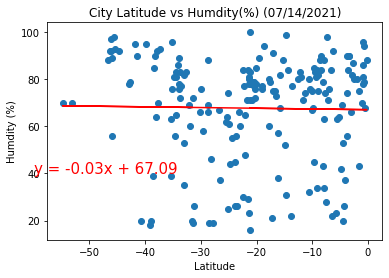

In [131]:
# Create data and plot for Latitude / Humidity regression for Southern Hemisphere
humidity = cities_Southern_df['Humidity']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, humidity)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,humidity)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humdity (%)')
plt.title('City Latitude vs Humdity(%) (07/14/2021)')
plt.annotate(line_eq,(-60,40),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/NHCity_Humidity.png")
plt.show()

 Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0028


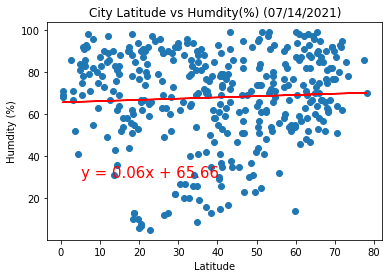

In [132]:
# Create data and plot for Latitude / Humidity regression for Northern Hemisphere

humidity = cities_Northern_df['Humidity']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, humidity)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,humidity)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Humdity (%)')
plt.title('City Latitude vs Humdity(%) (07/14/2021)')
plt.annotate(line_eq,(5,30),fontsize=15,color="red", annotation_clip=False)

print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/SHCity_Humidity.png")
plt.show()

Data Analysis: There is no detectable relationship between Latitude and Humidity on a global basis.  

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0013


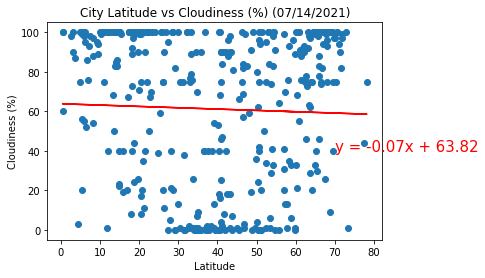

In [124]:
# Create data and plot for Latitude / Cloudiness regression for Northern Hemisphere

cloudiness = cities_Northern_df['Cloudiness']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, cloudiness)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,cloudiness)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%) (07/14/2021)')
plt.annotate(line_eq,(70,40),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/NHCity_Cloudiness.png")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0014


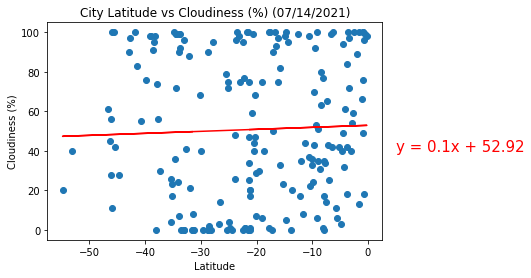

In [125]:
# Create data and plot for Latitude / Cloudiness regression for Southern Hemisphere
cloudiness = cities_Southern_df['Cloudiness']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, cloudiness)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,cloudiness)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%) (07/14/2021)')
plt.annotate(line_eq,(5,40),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/SHCity_Cloudiness.png")
plt.show()

Data Analysis: There is no detectable relationship between Latitude and Cloudiness on a global basis.

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0112


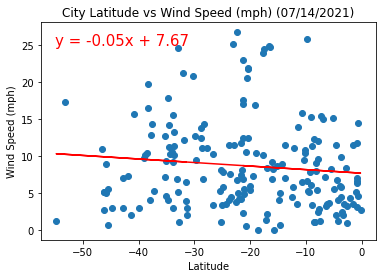

In [140]:
# Create data and plot for Latitude / Windspeed regression for Southern Hemisphere

windspeed = cities_Southern_df['Wind Speed']
Lat = cities_Southern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, windspeed)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,windspeed)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph) (07/14/2021)')
plt.annotate(line_eq,(-55,25),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/SHCity_Windspeed.png")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002


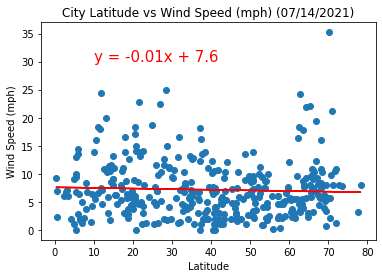

In [151]:
# Create data and plot for Latitude / Windspeed regression for Southern Hemisphere

windspeed = cities_Northern_df['Wind Speed']
Lat = cities_Northern_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Lat, windspeed)
regress_values =Lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(Lat,windspeed)
plt.plot(Lat,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (mph) (07/14/2021)')
plt.annotate(line_eq,(10,30),fontsize=15,color="red", annotation_clip=False)


print(f"The r-squared is: {round(r2,4)}")
plt.savefig("output_data/NHCity_Windspeed.png")
plt.show()

In [ ]:
Data Analysis: There is no detectable relationship between Latitude and Wind Speed on a global basis.